# Customer and Marketing Insights - Purchase Analytics

In [2]:
#Import the necessary library for Purchase Analytics
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle as pc

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import the data to be used for the analytics
data=pd.read_csv("purchase data.csv")
data.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [4]:
#Describe the statistics of the purchase data set
data.describe()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,5.869300e+04,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,...,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,2.000003e+08,349.431074,0.249399,0.844309,0.691973,0.840799,0.248070,1.392074,1.780999,2.006789,...,0.042799,0.117851,0.035865,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,1.443167e+02,212.045058,0.432669,1.633083,1.498734,1.631628,0.431897,0.091139,0.170868,0.046867,...,0.202405,0.322434,0.185954,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,2.000000e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,1.260000,1.870000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,2.000001e+08,161.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.340000,1.580000,1.970000,...,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,2.000003e+08,343.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.390000,1.880000,2.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,2.000004e+08,530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.470000,1.890000,2.060000,...,0.000000,0.000000,0.000000,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,2.000005e+08,730.000000,1.000000,5.000000,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,...,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


In [5]:
#Check the number of missing values in the dataset
data.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

# Import the Segmentation Model for Segmentation Prediction

In [6]:
scaler=pc.load(open("scaler.pickle", "rb"))
pca=pc.load(open("pca.pickle", "rb"))
kmeans_pca=pc.load(open("kmeans_pca.pickle", "rb"))

# Standardising the purchasing data

In [10]:
attributes=data[["Sex", "Marital status", "Age", "Education", "Income", "Occupation", "Settlement size"]]
data_seg=scaler.transform(attributes)

## Principal Component Analysis (PCA) & KMeans PCA

In [11]:
data_seg_pca=pca.transform(data_seg)

In [12]:
#Kmeans PCA
purc_seg_pca=kmeans_pca.predict(data_seg_pca)

In [13]:
purc_seg_pred=data.copy()

In [14]:
purc_seg_pred["Segment"]=purc_seg_pca

# Customer Data Analysis - on Segment basis

In [92]:
purc_seg_pred.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


In [16]:
t1=purc_seg_pred[["ID", "Incidence"]].groupby(["ID"], as_index=False).count()
t1=t1.set_index("ID")
t1=t1.rename(columns={"Incidence": "N_Visits"})
t1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [17]:
t2=purc_seg_pred[["ID", "Incidence"]].groupby(["ID"], as_index=False).sum()
t2=t2.set_index("ID")
t2=t2.rename(columns={"Incidence": "N_Purchase"})
t2.head()

,N_Purchase
ID,
200000001,9
200000002,11
200000003,10
200000004,11
200000005,13


In [20]:
t3=t1.join(t2)
t3.head()

,N_Visits,N_Purchase
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [23]:
t3["Average N_Purchase"]=t3["N_Purchase"]/t3["N_Visits"]
t3.head()

,N_Visits,N_Purchase,Average N_Purchase
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [30]:
t4=purc_seg_pred[["ID", "Segment"]].groupby(["ID"], as_index=False).mean()
t4=t4.set_index("ID")
purc_behav_analysis=t3.join(t4)
purc_behav_analysis.head()

,N_Visits,N_Purchase,Average N_Purchase,Segment
ID,,,,
200000001,101,9,0.089109,0
200000002,87,11,0.126437,3
200000003,97,10,0.103093,0
200000004,85,11,0.129412,0
200000005,111,13,0.117117,1


# Customer Segment Proportion

In [142]:
seg_prop=purc_behav_analysis[["N_Purchase", "Segment"]].groupby(["Segment"]).count()/purc_behav_analysis.shape[0]

seg_prop.rename(columns={"N_Purchases": "Segment Proportions"})


,N_Purchase
Segment,
0,0.378
1,0.222
2,0.206
3,0.194


([<matplotlib.patches.Wedge at 0x1db23035e08>,
 [Text(0.41135515458462724, 1.0201896572680285, 'Standard'),
  Text(-1.09737375346957, 0.07596607924664538, 'Career-Focused'),
  Text(-0.32013982213534214, -1.052383244965042, 'Fewer-Opportunies'),
  Text(0.9019473089387411, -0.6296753543677592, 'Well-off')],
 [Text(0.2243755388643421, 0.556467085782561, '37.8%'),
  Text(-0.5985675018924926, 0.04143604322544293, '22.2%'),
  Text(-0.17462172116473204, -0.5740272245263865, '20.6%'),
  Text(0.49197125942113146, -0.3434592842005959, '19.4%')])

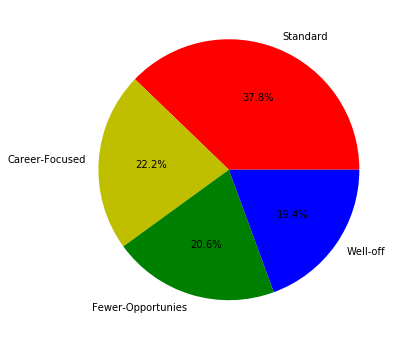

In [55]:
plt.figure(figsize=(9,6))
plt.pie(seg_prop["N_Purchase"], 
       labels=["Standard", "Career-Focused", "Fewer-Opportunies", "Well-off"],
       colors=("r", "y", "g", "b"),
       autopct="%1.1f%%")

# Purchase Occasion and Purchase Incidence

In [72]:
segment_avg=purc_behav_analysis.groupby(["Segment"]).mean()
segment_avg

,N_Visits,N_Purchase,Average N_Purchase
Segment,,,
0,113.894180,22.793651,0.201679
1,123.216216,39.603604,0.281944
2,117.699029,24.902913,0.212773
3,117.185567,34.731959,0.285639


In [68]:
segment_std=purc_behav_analysis.groupby(["Segment"]).std()
segment_std

,N_Visits,N_Purchase,Average N_Purchase
Segment,,,
0,16.397308,13.803513,0.120305
1,44.730792,53.551552,0.199518
2,19.039605,16.774464,0.126603
3,20.794796,26.003011,0.172293


Text(0.5, 1.0, 'Average Number of Store Visits per Customer Segments')

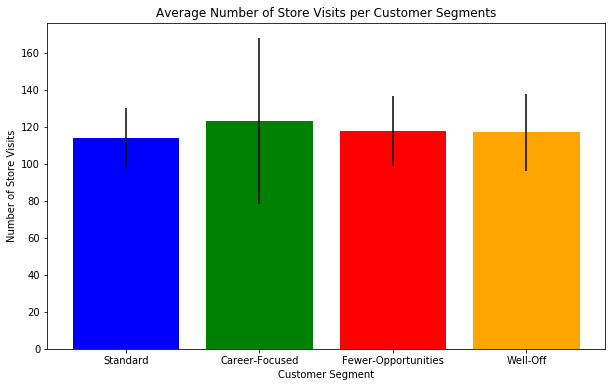

In [85]:
#How often do people from different segments visit store on average
plt.figure(figsize=(10,6))
plt.bar(x=(0,1,2,3),
       tick_label=("Standard", "Career-Focused", "Fewer-Opportunities", "Well-Off"),
       height=segment_avg["N_Visits"],
       yerr=segment_std["N_Visits"],
       color=("b","g", "r", "orange"))
plt.xlabel("Customer Segment")
plt.ylabel("Number of Store Visits")
plt.title("Average Number of Store Visits per Customer Segments")

Text(0.5, 1.0, 'Number of Purchase Incidence per Customer Segments')

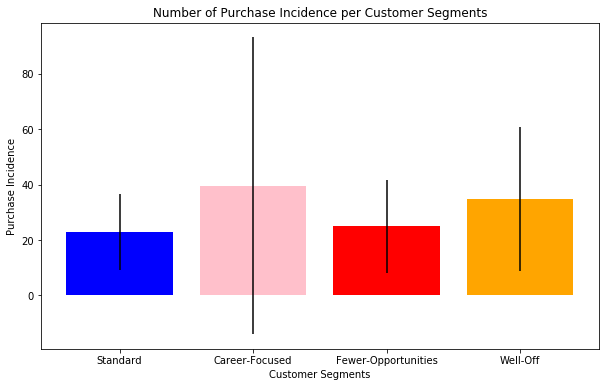

In [91]:
#How often do customers from different segments purchase from the store on average
plt.figure(figsize=(10,6))
plt.bar(x=(0,1,2,3),
       tick_label=("Standard", "Career-Focused", "Fewer-Opportunities", "Well-Off"),
       height=segment_avg["N_Purchase"],
       yerr=segment_std["N_Purchase"],
       color=("b","pink", "r", "orange"))
plt.xlabel("Customer Segments")
plt.ylabel("Purchase Incidence")
plt.title("Number of Purchase Incidence per Customer Segments")

# Customer's Brand Choice

In [94]:
purc_incidence=purc_seg_pred[purc_seg_pred["Incidence"]==1]
purc_incidence.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,0


In [97]:
brand_dummies=pd.get_dummies(purc_incidence["Brand"], prefix="Brand", prefix_sep="_")
brand_dummies["Segment"], brand_dummies["ID"]=purc_incidence["Segment"], purc_incidence["ID"]

In [98]:
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,0,200000001
11,0,0,0,0,1,0,200000001
19,1,0,0,0,0,0,200000001
24,0,0,0,1,0,0,200000001
29,0,1,0,0,0,0,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,0,200000500
58648,1,0,0,0,0,0,200000500
58674,0,1,0,0,0,0,200000500
58687,0,1,0,0,0,0,200000500


In [99]:
t=brand_dummies.groupby(["ID"], as_index=True).mean()

In [101]:
avg_brand_choice=t.groupby(["Segment"], as_index=True).mean()

Text(0.5, 1, 'Average Brand Choice by Segment')

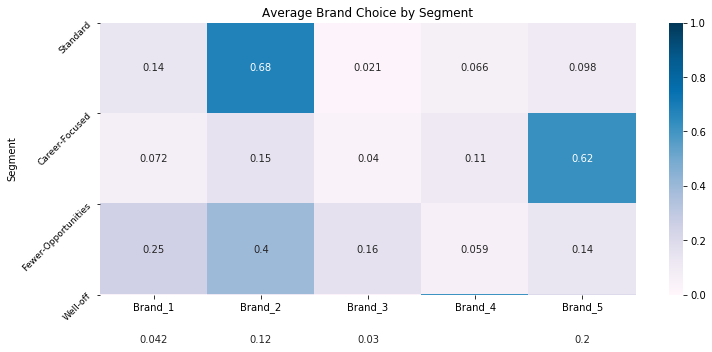

In [105]:
plt.figure(figsize=(12,5))
sns.heatmap(avg_brand_choice,
           vmin=0,
           vmax=1,
           cmap="PuBu",
           annot=True)
plt.yticks([0,1,2,3], ["Standard", "Career-Focused", "Fewer-Opportunities", "Well-off"],
          rotation=45, fontsize=9)
plt.title("Average Brand Choice by Segment")


# Revenue

In [125]:
#Revenue Brand 1
t1=purc_seg_pred[purc_seg_pred["Brand"]==1]
t1.loc[:, "Revenue Brand 1"]=t1["Price_1"]*t1["Quantity"]
seg_brand_sales=pd.DataFrame()


In [126]:
seg_brand_sales[["Segment", "Revenue Brand 1"]]=t1[["Segment", "Revenue Brand 1"]].groupby(["Segment"], as_index=False).sum()
seg_brand_sales

,Segment,Revenue Brand 1
0,0,2258.90
1,1,736.09
2,2,2611.19
3,3,699.47


In [127]:
#Revenue Brand 2
t1=purc_seg_pred[purc_seg_pred["Brand"]==2]
t1.loc[:, "Revenue Brand 2"]=t1["Price_2"]*t1["Quantity"]
seg_brand_sales[["Segment", "Revenue Brand 2"]]=t1[["Segment", "Revenue Brand 2"]].groupby(["Segment"], as_index=False).sum()

In [130]:
#Revenue Brand 3
t1=purc_seg_pred[purc_seg_pred["Brand"]==3]
t1.loc[:, "Revenue Brand 3"]=t1["Price_3"]*t1["Quantity"]
seg_brand_sales[["Segment", "Revenue Brand 3"]]=t1[["Segment", "Revenue Brand 3"]].groupby(["Segment"], as_index=False).sum()

In [131]:
#Revenue Brand 4
t1=purc_seg_pred[purc_seg_pred["Brand"]==4]
t1.loc[:, "Revenue Brand 4"]=t1["Price_4"]*t1["Quantity"]
seg_brand_sales[["Segment", "Revenue Brand 4"]]=t1[["Segment", "Revenue Brand 4"]].groupby(["Segment"], as_index=False).sum()

In [133]:
#Revenue Brand 5
t1=purc_seg_pred[purc_seg_pred["Brand"]==2]
t1.loc[:, "Revenue Brand 5"]=t1["Price_5"]*t1["Quantity"]
seg_brand_sales[["Segment", "Revenue Brand 5"]]=t1[["Segment", "Revenue Brand 5"]].groupby(["Segment"], as_index=False).sum()

In [138]:
seg_brand_sales["Total Revenue"]=(seg_brand_sales["Revenue Brand 1"]+
                                   seg_brand_sales["Revenue Brand 2"]+
                                   seg_brand_sales["Revenue Brand 3"]+
                                   seg_brand_sales["Revenue Brand 4"]+
                                   seg_brand_sales["Revenue Brand 5"])
seg_brand_sales

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2258.90,13909.78,722.06,1805.59,21826.78,40523.11
1,1,736.09,1791.78,664.75,2363.84,2822.49,8378.95
2,2,2611.19,4768.52,3909.17,861.38,7480.45,19630.71
3,3,699.47,1298.23,725.54,14009.29,2026.97,18759.50


In [146]:
seg_brand_sales["Segment Proportions"]=seg_prop["N_Purchase"]
seg_brand_sales["Segment"]=seg_brand_sales["Segment"].map({0:"Standard",
                                                          1: "Career-Focused",
                                                          2: "Fewer-Opportunities",
                                                          3: "Well-Off"})
seg_brand_sales

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
0,Standard,2258.90,13909.78,722.06,1805.59,21826.78,40523.11,0.378
1,Career-Focused,736.09,1791.78,664.75,2363.84,2822.49,8378.95,0.222
2,Fewer-Opportunities,2611.19,4768.52,3909.17,861.38,7480.45,19630.71,0.206
3,Well-Off,699.47,1298.23,725.54,14009.29,2026.97,18759.50,0.194


### The End